In [1]:
import pandas as pd

In [2]:
from pathlib import Path

In [3]:
in_dir = Path('data/logs/step_log_2023-12-13_14-02.csv')

In [4]:
logs = [pd.read_csv('../../data/logs/step_log_2023-12-15_06-20.csv')]

In [5]:
# logs = []

# for f in in_dir.iterdir():
#     try:
#         this_log = pd.read_csv(f)
#     except:
#         print(f)

#     if '12-12_04-48' not in f.name:
#        continue

#     logs.append(this_log)

In [6]:
all_logs = pd.concat(logs)

In [7]:
all_logs.loc[all_logs['Cell Index'] == 740]

,Episode,Total Reward,Epsilon,Cell Index,Action Type,Reward,Energy Output,Unmet Demand


In [8]:
all_logs['Unmet Demand'].min()

23857858.0

In [9]:
all_logs = all_logs.reset_index()

In [10]:
all_logs['Unmet Demand'].argmin()

33153

In [11]:
all_logs['Epsilon'] = all_logs['Epsilon'].bfill()
all_logs['Episode'] = all_logs['Episode'].bfill()
all_logs['Total Reward'] = all_logs['Total Reward'].bfill()

In [12]:
all_logs = all_logs.sort_values(by=['Episode', 'index'], ascending=[True, True])
all_logs

,index,Episode,Total Reward,Epsilon,Cell Index,Action Type,Reward,Energy Output,Unmet Demand
0,0,1.0,52.376111,1.0,1955.0,wind,0.0,49320.0,57138179.0
1,1,1.0,52.376111,1.0,10567.0,solar,0.0,559470.0,56628029.0
2,2,1.0,52.376111,1.0,3439.0,wind,0.0,616945.0,56570554.0
3,3,1.0,52.376111,1.0,3452.0,wind,0.0,659769.0,56527730.0
4,4,1.0,52.376111,1.0,8041.0,wind,0.0,691253.0,56496246.0
...,...,...,...,...,...,...,...,...,...
37489,37489,NaN,NaN,NaN,7848.0,wind,0.0,55923966.0,25407340.0
37490,37490,NaN,NaN,NaN,14344.0,solar,0.0,56422336.0,25375094.0
37491,37491,NaN,NaN,NaN,13418.0,wind,0.0,56454839.0,25354747.0
37492,37492,NaN,NaN,NaN,11425.0,solar,0.0,56961094.0,25321316.0


In [13]:
res = all_logs.groupby(by='Episode').agg({'Total Reward': 'max', 'Unmet Demand': 'min', 
                                         'Epsilon': 'first'})

In [14]:
res['rolling_mean_reward'] = res['Total Reward'].rolling(5).mean()
res['rolling_mean_unmet'] = res['Unmet Demand'].rolling(5).mean()

In [15]:
res

,Total Reward,Unmet Demand,Epsilon,rolling_mean_reward,rolling_mean_unmet
Episode,,,,,
1.0,52.376111,26735323.0,1.000000,NaN,NaN
2.0,77.922675,25342877.0,0.965000,NaN,NaN
3.0,43.188418,26299708.0,0.931225,NaN,NaN
4.0,55.851854,26605306.0,0.898632,NaN,NaN
5.0,70.876292,26036315.0,0.867180,60.043070,26203905.8
...,...,...,...,...,...
94.0,51.169942,25988699.0,0.036395,33.368550,25617921.2
95.0,62.645519,25464022.0,0.035121,37.609281,25658713.8
96.0,-1.443956,25155513.0,0.033892,30.249759,25761194.4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


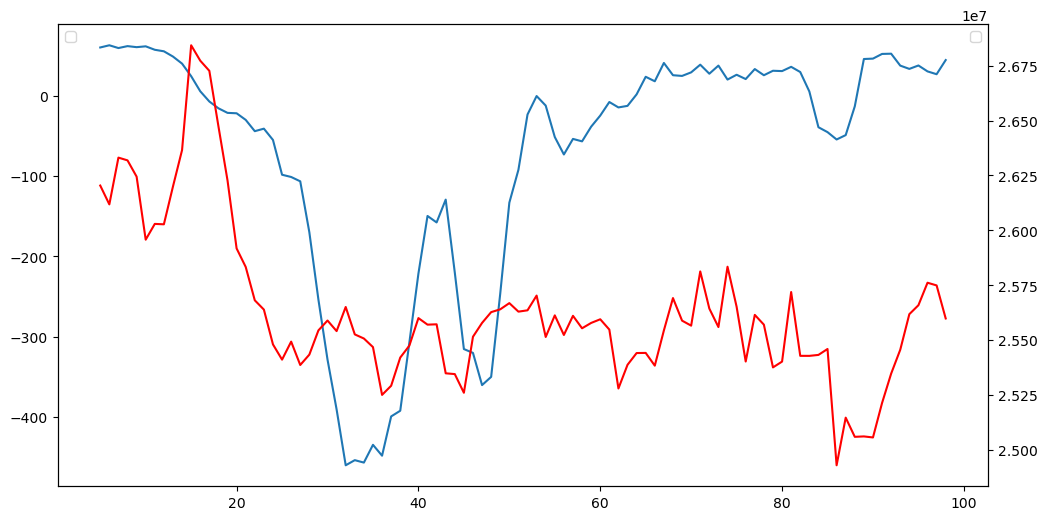

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
ax2 = ax.twinx()

#ax.plot(res['Total Reward'], label='reward', alpha=0.7, linewidth=1.5,)
ax.plot(res['rolling_mean_reward'], label=None, linewidth=1.5, color='C0')
#ax2.plot(res['Unmet Demand'], color='red', label='unmet demand', alpha=0.7, linewidth=1.5)
ax2.plot(res['rolling_mean_unmet'], label=None, linewidth=1.5, color='red')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

In [17]:
res.index.values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
       79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91.,
       92., 93., 94., 95., 96., 97., 98.])

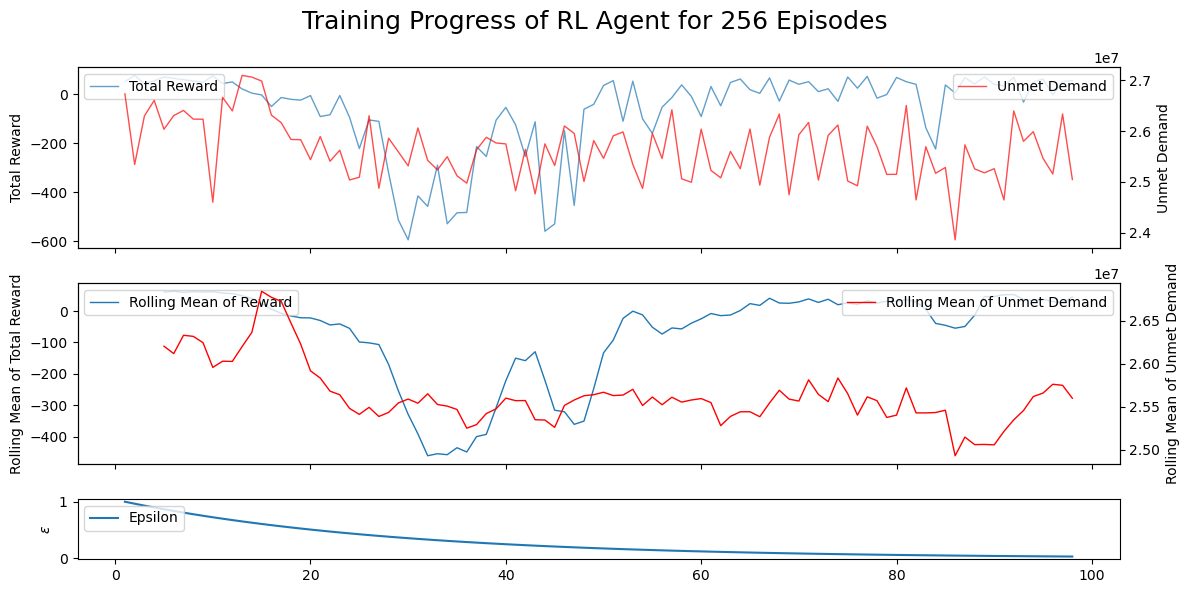

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 6), gridspec_kw={'height_ratios': [3, 3, 1]}, sharex=True)

ax_flat = ax.flatten()

ax0_0 = ax_flat[0]
ax0_1 = ax0_0.twinx()
ax1_0 = ax_flat[1]
ax1_1 = ax1_0.twinx()
ax2_0 = ax_flat[2]

ax0_0.plot(res.index.values, res['Total Reward'], label='Total Reward', alpha=0.7, linewidth=1)
ax0_1.plot(res.index.values, res['Unmet Demand'], color='red', label='Unmet Demand', alpha=0.7, linewidth=1)
ax0_0.set_ylabel('Total Reward')
ax0_1.set_ylabel('Unmet Demand')
ax0_0.legend(loc='upper left')
ax0_1.legend(loc='upper right')

ax1_0.plot(res.index.values, res['rolling_mean_reward'], linewidth=1, label='Rolling Mean of Reward')
ax1_1.plot(res.index.values, res['rolling_mean_unmet'], linewidth=1, color='red', label='Rolling Mean of Unmet Demand')
ax1_0.set_ylabel('Rolling Mean of Total Reward')
ax1_1.set_ylabel('Rolling Mean of Unmet Demand')
ax1_0.legend(loc='upper left')
ax1_1.legend(loc='upper right')

ax2_0.plot(res.index.values, res['Epsilon'], label='Epsilon')
ax2_0.set_ylabel('$\epsilon$')
ax2_0.legend(loc='upper left')

plt.suptitle('Training Progress of RL Agent for 256 Episodes', size=18)
plt.tight_layout()
plt.savefig('../../figures/final_model_training_logs.png', dpi=300)

In [20]:
# %matplotlib inline



# plt.scatter(best_unmet, rewards)

In [21]:
(all_logs.groupby(by=['Episode', 'Cell Index']).size().sort_values() == 2).sum()

2783

In [22]:
(all_logs.groupby(by=['Episode', 'Cell Index']).size().sort_values() == 1).sum()

25403

In [23]:
all_logs.groupby(by='Cell Index').size().quantile(0.95)

42.0

In [24]:
choice_groups = all_logs.groupby(by='Cell Index').agg({'index': 'count', 'Reward': 'mean'})
choice_groups = choice_groups.rename(columns={'index': 'n_times_chosen', 'Reward': 'mean_reward'})
choice_groups

,n_times_chosen,mean_reward
Cell Index,,
1556.0,2,0.000000
1557.0,31,-0.322581
1558.0,11,-0.363636
1653.0,1,0.000000
1654.0,2,0.000000
...,...,...
18247.0,10,0.000000
18248.0,8,0.000000
18249.0,5,0.000000


In [25]:
all_logs['Episode'].max()

98.0

In [26]:
choice_groups.groupby(by='n_times_chosen')['mean_reward'].mean()

n_times_chosen
1      0.000000
2     -0.014528
3     -0.036923
4     -0.046559
5     -0.046154
         ...   
234   -1.623932
247   -1.489879
248   -1.540323
260   -1.553846
344   -1.691860
Name: mean_reward, Length: 105, dtype: float64

In [27]:
choice_groups.loc[choice_groups['n_times_chosen'] == 29]

,n_times_chosen,mean_reward
Cell Index,,
2728.0,29,-0.344828
3759.0,29,-0.344828
3822.0,29,-0.275862
4124.0,29,0.000000
4151.0,29,-0.206897
4745.0,29,-0.206897
5046.0,29,-0.413793
5349.0,29,-0.206897
5447.0,29,-0.275862


In [28]:
all_logs.loc[all_logs['Cell Index'] == 1859].sort_values(by='Episode')

,index,Episode,Total Reward,Epsilon,Cell Index,Action Type,Reward,Energy Output,Unmet Demand


In [29]:
choice_groups.loc[choice_groups['n_times_chosen'] == 12]

,n_times_chosen,mean_reward
Cell Index,,
1755.0,12,0.000000
2155.0,12,-0.166667
2668.0,12,-0.166667
2961.0,12,-0.333333
3132.0,12,0.000000
3330.0,12,0.000000
3347.0,12,0.000000
3445.0,12,0.000000
4421.0,12,0.000000


In [30]:
action_type_agg_count = all_logs.groupby(by=['Episode', 'Action Type']).size()
action_type_agg_count.name = 'count'
action_type_agg_count = action_type_agg_count.reset_index()

unmet_demand = all_logs.groupby(by='Episode').agg({'Unmet Demand': 'min'})
total_reward = all_logs.groupby(by='Episode').agg({'Total Reward': 'last'})

action_type_agg_count = action_type_agg_count.merge(unmet_demand, on='Episode', how='left')
action_type_agg_count = action_type_agg_count.merge(total_reward, on='Episode', how='left')

Text(0, 0.5, 'Unmet Demand at End of Episode')

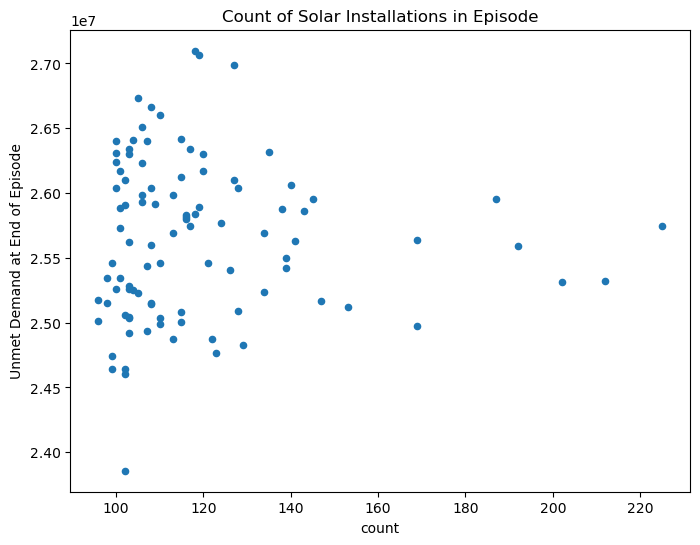

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))

action_type_agg_count.loc[action_type_agg_count['Action Type'] == 'solar'].plot.scatter('count', 'Unmet Demand', title='Count of Solar Installations in Episode', ax=ax)

ax.set_ylabel('Unmet Demand at End of Episode')

Text(0, 0.5, 'Total Reward at End of Episode')

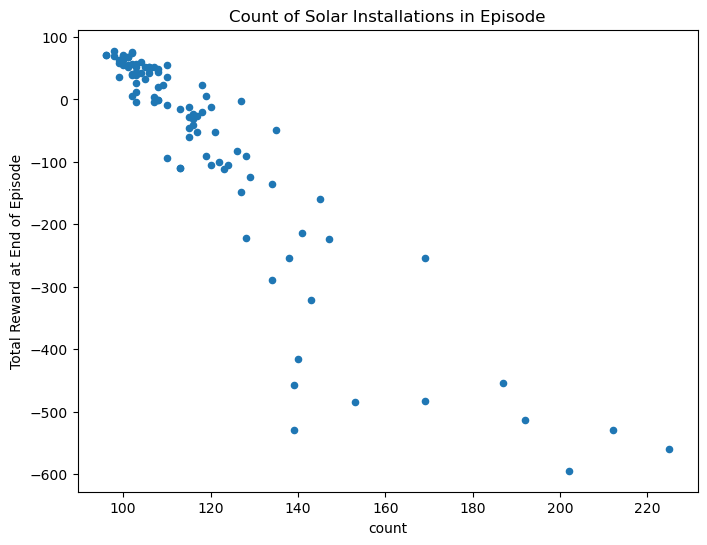

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))

action_type_agg_count.loc[action_type_agg_count['Action Type'] == 'solar'].plot.scatter('count', 'Total Reward', title='Count of Solar Installations in Episode', ax=ax)

ax.set_ylabel('Total Reward at End of Episode')

In [33]:
action_type_agg_count.sort_values(by='Unmet Demand')

,Episode,Action Type,count,Unmet Demand,Total Reward
170,86.0,solar,102,23857858.0,6.212028
171,86.0,wind,298,23857858.0,6.212028
19,10.0,wind,258,24600399.0,76.069121
18,10.0,solar,102,24600399.0,76.069121
181,91.0,wind,276,24643110.0,35.353658
...,...,...,...,...,...
29,15.0,wind,157,26987141.0,-2.071370
26,14.0,solar,119,27064502.0,5.352614
27,14.0,wind,178,27064502.0,5.352614
24,13.0,solar,118,27098518.0,22.464953


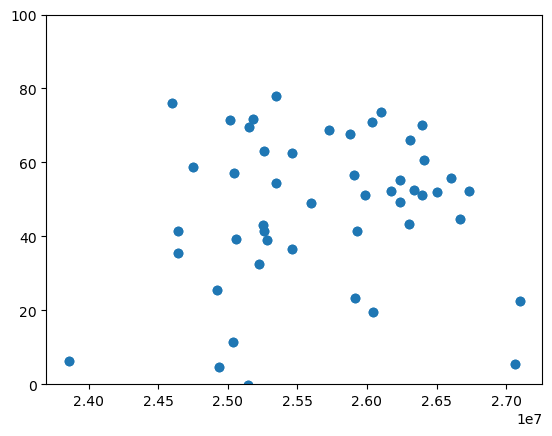

In [37]:
plt.scatter(action_type_agg_count['Unmet Demand'], action_type_agg_count['Total Reward'])
plt.ylim([0,100])
plt.show()

In [34]:
action_type_agg_count.sort_values(by='Episode')

,Episode,Action Type,count,Unmet Demand,Total Reward
0,1.0,solar,105,26735323.0,52.376111
1,1.0,wind,186,26735323.0,52.376111
2,2.0,solar,98,25342877.0,77.922675
3,2.0,wind,218,25342877.0,77.922675
5,3.0,wind,187,26299708.0,43.188418
...,...,...,...,...,...
190,96.0,solar,108,25155513.0,-1.443956
193,97.0,wind,208,26337365.0,52.505189
192,97.0,solar,103,26337365.0,52.505189
195,98.0,wind,231,25046313.0,57.003389
